# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Hubungkan Google Drive
drive.mount('/drive')

# Tentukan path dataset
file_path = '/drive/MyDrive/Dataset_inisiasi.csv'

# Muat dataset ke dalam dataframe
df = pd.read_csv(file_path)

# Tampilkan beberapa baris awal untuk memahami struktur data
df.head()


Mounted at /drive


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53.0,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90.0,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73.0,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59.0,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35.0,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dataset memiliki 243949 baris dan 11 kolom.
Jenis data di setiap kolom:
Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity         float64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object
Jumlah data yang hilang per kolom:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       1
Quantity         1
Discount         1
Total_Price      1
Region           1
Order_Date       1
dtype: int64
Statistik deskriptif untuk variabel numerik:
          Unit_Price       Quantity       Discount    Total_Price
count  243948.000000  243948.000000  243948.000000  243948.000000
mean        5.841677      23.026358       0.029580     131.690751
std        14.778627      26.825133       0.044709     521.527540
min         0.320000       1.000000       0.000000       0.300000
25%    

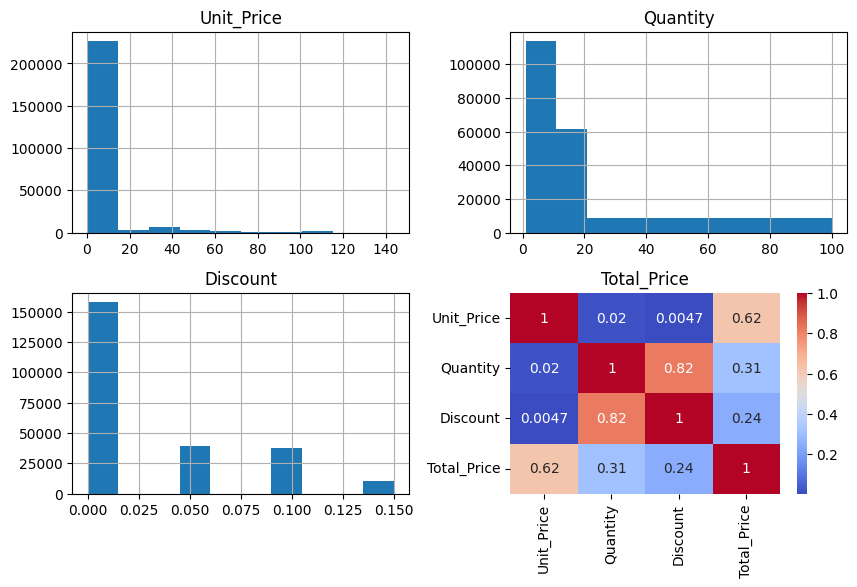

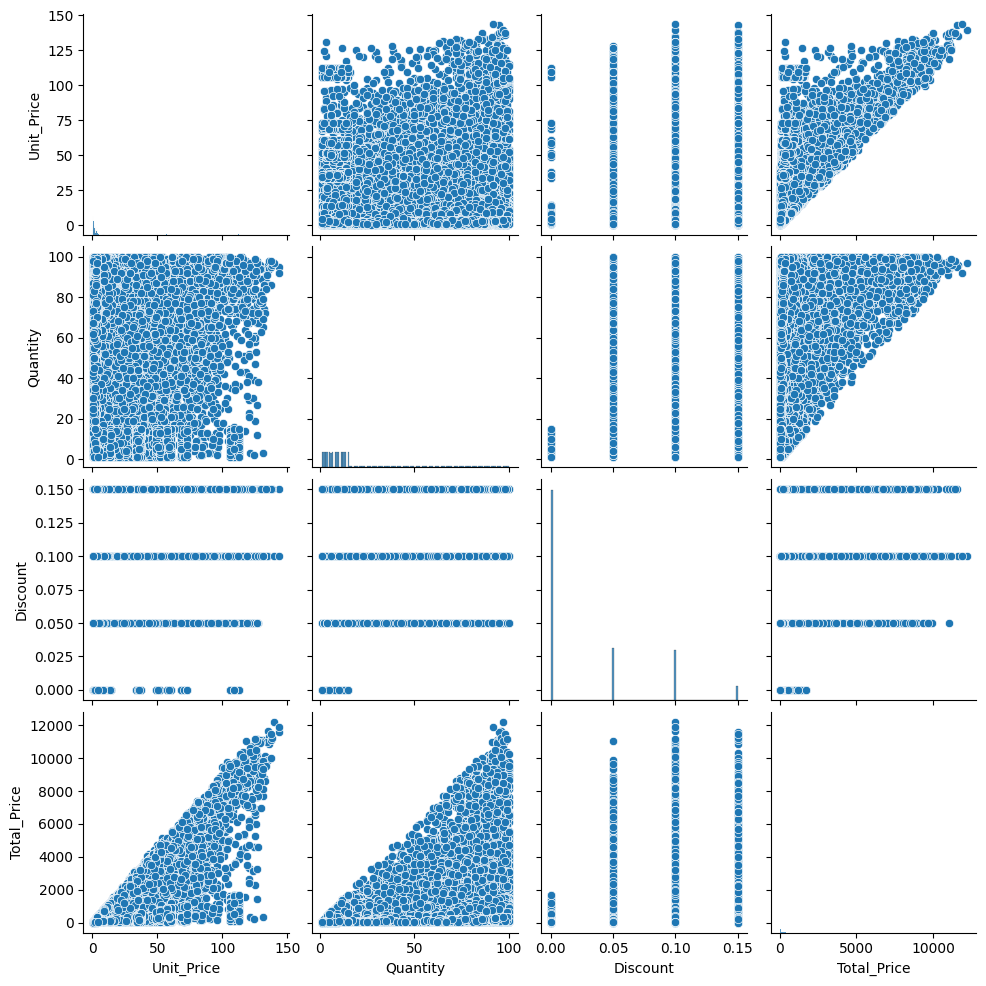

In [15]:
# 1. Memahami Struktur Data
# Tinjau jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df.shape
print(f"Dataset memiliki {jumlah_baris} baris dan {jumlah_kolom} kolom.")

# Tinjau jenis data di setiap kolom
print("Jenis data di setiap kolom:")
print(df.dtypes)

# 2. Menangani Data yang Hilang
# Identifikasi jumlah data yang hilang di setiap kolom
print("Jumlah data yang hilang per kolom:")
print(df.isnull().sum())

# 3. Analisis Distribusi dan Korelasi
# Tinjau statistik deskriptif untuk variabel numerik
print("Statistik deskriptif untuk variabel numerik:")
print(df.describe())

# 4. Visualisasi Data
# Histogram untuk distribusi variabel numerik
df.hist(figsize=(10, 6))

# Diagram batang untuk variabel kategorikal
df.select_dtypes(include=['object']).nunique().plot(kind='bar')

numeric_df = df.select_dtypes(include=np.number)

# Heatmap untuk melihat korelasi antar variabel numerik
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

# Scatter plot untuk melihat hubungan antar variabel
sns.pairplot(numeric_df)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Jumlah data yang hilang per kolom sebelum ditangani:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       1
Quantity         1
Discount         1
Total_Price      1
Region           1
Order_Date       1
dtype: int64
Jumlah data yang hilang setelah penanganan:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64
Jumlah duplikasi sebelum: 0
Jumlah duplikasi setelah: 0
  Order_ID Customer_ID  Product  Unit_Price  Quantity  Discount  Total_Price  \
0     ORD1     CUS1496       42        1.66      53.0      0.10       79.180   
1     ORD1     CUS1496        9        1.56      90.0      0.10      126.360   
2     ORD1     CUS1496       38        1.17      73.0      0.05       81.140   
3     ORD1     CUS1496       29        3.22      59.0      0.10      159.525   
4  

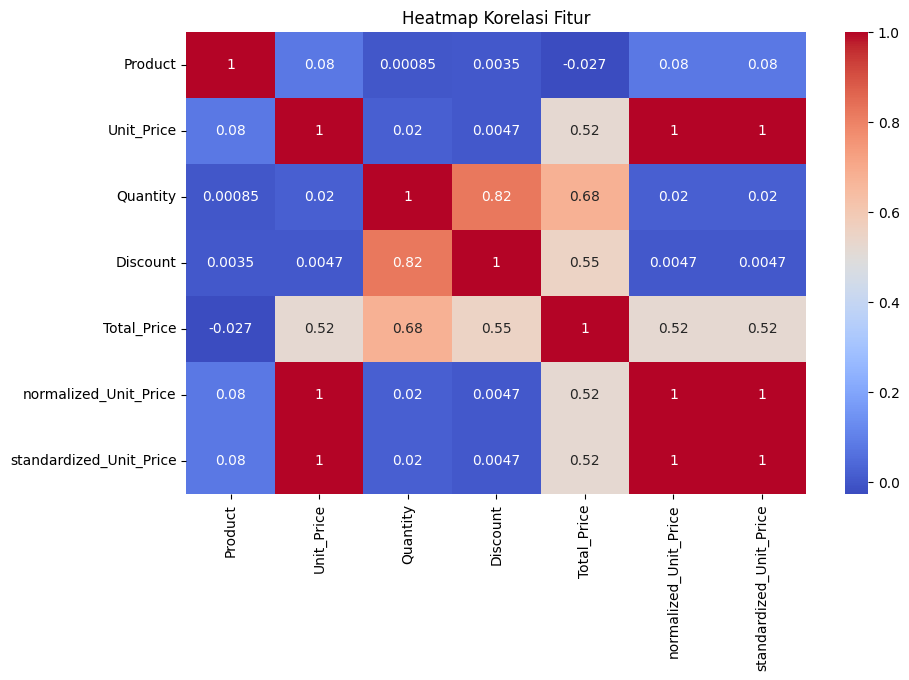

In [16]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
print("Jumlah data yang hilang per kolom sebelum ditangani:")
print(df.isnull().sum())

# Menentukan kolom numerik dan kategorikal
numeric_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

# Isi data kosong: Numerik → Mean, Kategorikal → Mode
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

print("Jumlah data yang hilang setelah penanganan:")
print(df.isnull().sum())

# 2. Menghapus Data Duplikat
print(f"Jumlah duplikasi sebelum: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah duplikasi setelah: {df.duplicated().sum()}")

# 3. Normalisasi atau Standarisasi Fitur
selected_column = "Unit_Price"  # Ganti dengan kolom numerik yang sesuai

if selected_column in df.columns:
    df["normalized_" + selected_column] = (df[selected_column] - df[selected_column].min()) / (df[selected_column].max() - df[selected_column].min())
    df["standardized_" + selected_column] = (df[selected_column] - df[selected_column].mean()) / df[selected_column].std()

# 4. Deteksi dan Penanganan Outlier (Menggunakan IQR)
outlier_column = "Total_Price"  # Ganti dengan kolom numerik yang sesuai

if outlier_column in df.columns:
    Q1 = df[outlier_column].quantile(0.25)
    Q3 = df[outlier_column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[outlier_column] = np.where(df[outlier_column] < lower_bound, lower_bound,
                                  np.where(df[outlier_column] > upper_bound, upper_bound, df[outlier_column]))

# 5. Encoding Data Kategorikal (Pastikan kolom masih ada)
categorical_columns_to_encode = ["Customer_Type", "Category", "Region"]
existing_columns = [col for col in categorical_columns_to_encode if col in df.columns]

if existing_columns:
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True)
else:
    print("Kolom kategorikal untuk encoding tidak ditemukan dalam dataset.")

# Label encoding untuk kategori berurutan (contoh: Product)
if "Product" in df.columns:
    df["Product"] = df["Product"].astype("category").cat.codes

# 6. Binning (Pengelompokan Data)
binning_column = "Quantity"  # Sesuaikan dengan dataset
if binning_column in df.columns:
    df["binned_" + binning_column] = pd.cut(df[binning_column], bins=3, labels=["low", "medium", "high"])

# Menampilkan hasil akhir
print(df.head())

# 7. Visualisasi Data Setelah Preprocessing
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Centroid Cluster:
 [[ 2.35922291e+01  2.13745922e+00  1.27919566e+01  1.57372112e-02
   1.93799295e+01  1.26528768e-02 -2.50647496e-01]
 [ 2.32074845e+01  1.74528779e+01  5.51069968e+01  7.29726040e-02
   1.36040421e+02  1.19276510e-01  7.85676798e-01]]
Label Tiap Data:
 [1 1 1 ... 0 0 1]


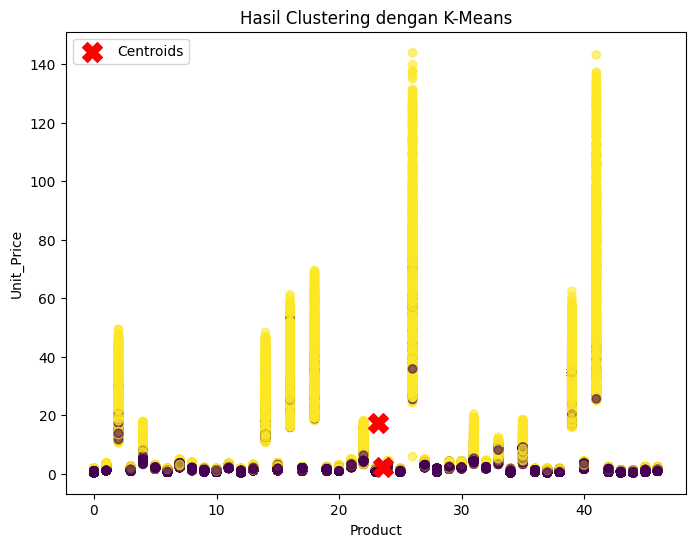

In [17]:
# Menggunakan hanya fitur numerik untuk clustering
data = df.select_dtypes(include=np.number)

# Pilih Algoritma Clustering (K-Means)
model = KMeans(n_clusters=2, random_state=42)
model.fit(data)

# Tambahkan hasil cluster ke dalam dataset
df["Cluster"] = model.labels_

# Cetak hasil clustering
print("Centroid Cluster:\n", model.cluster_centers_)
print("Label Tiap Data:\n", model.labels_)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=model.labels_, cmap="viridis", alpha=0.6)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title("Hasil Clustering dengan K-Means")
plt.legend()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

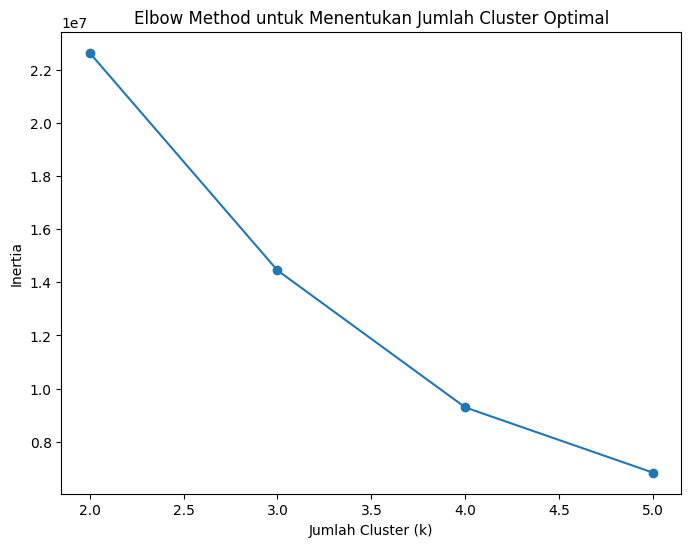

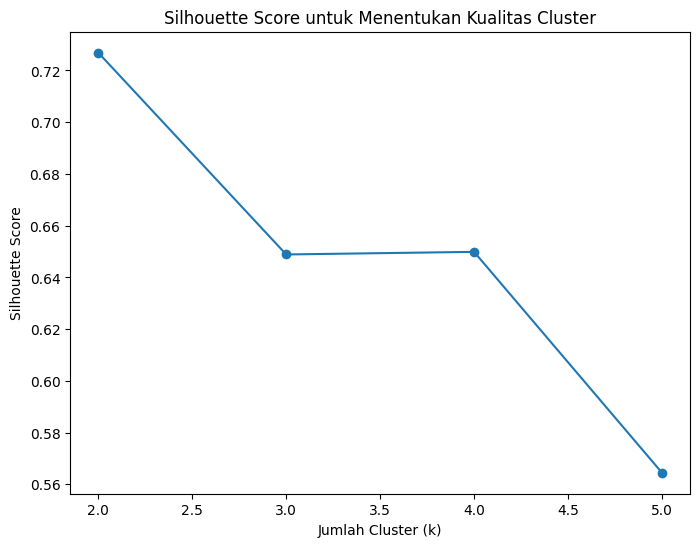

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [18]:
# Gunakan sampling untuk mempercepat
data_sample = data.sample(frac=0.1, random_state=42)

# Kurangi dimensi dengan PCA (jika fitur terlalu banyak)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_sample)

# Inisialisasi variabel
inertia = []
silhouette_scores = []
K_range = range(2, 6)  # Coba jumlah cluster dari 2 hingga 5

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_reduced)

    inertia.append(kmeans.inertia_)

    if len(set(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(data_reduced, kmeans.labels_))
    else:
        silhouette_scores.append(0)  # Jika hanya 1 cluster, beri nilai 0

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Kualitas Cluster")
plt.show()

# Tentukan jumlah cluster optimal
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

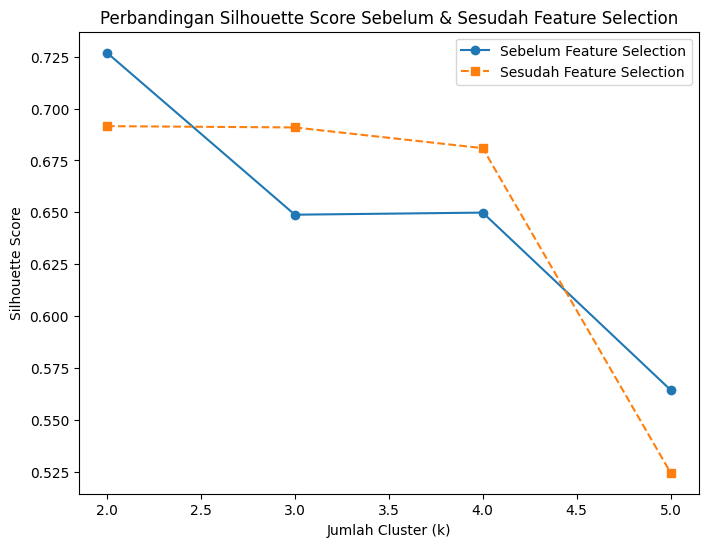

Jumlah cluster optimal setelah Feature Selection: 2


In [19]:
# Standarisasi hanya pada data yang sudah di-sampling sebelumnya
scaler = StandardScaler()
data_sample_scaled = scaler.fit_transform(data_sample)  # Gunakan data_sample, bukan data

# Pilih fitur terbaik menggunakan SelectKBest (ANOVA F-test)
k_best = SelectKBest(score_func=f_classif, k=2)
data_selected = k_best.fit_transform(data_sample_scaled, kmeans.labels_)  # Pastikan jumlahnya sama

# Lakukan pemodelan ulang dengan fitur terpilih
inertia_selected = []
silhouette_selected = []

for k in K_range:
    kmeans_selected = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_selected.fit(data_selected)

    inertia_selected.append(kmeans_selected.inertia_)

    if len(set(kmeans_selected.labels_)) > 1:
        silhouette_selected.append(silhouette_score(data_selected, kmeans_selected.labels_))
    else:
        silhouette_selected.append(0)

# Bandingkan performa sebelum & sesudah feature selection
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', label='Sebelum Feature Selection')
plt.plot(K_range, silhouette_selected, marker='s', linestyle='--', label='Sesudah Feature Selection')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score Sebelum & Sesudah Feature Selection")
plt.legend()
plt.show()

# Tentukan jumlah cluster optimal setelah feature selection
optimal_k_selected = K_range[silhouette_selected.index(max(silhouette_selected))]
print(f"Jumlah cluster optimal setelah Feature Selection: {optimal_k_selected}")


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

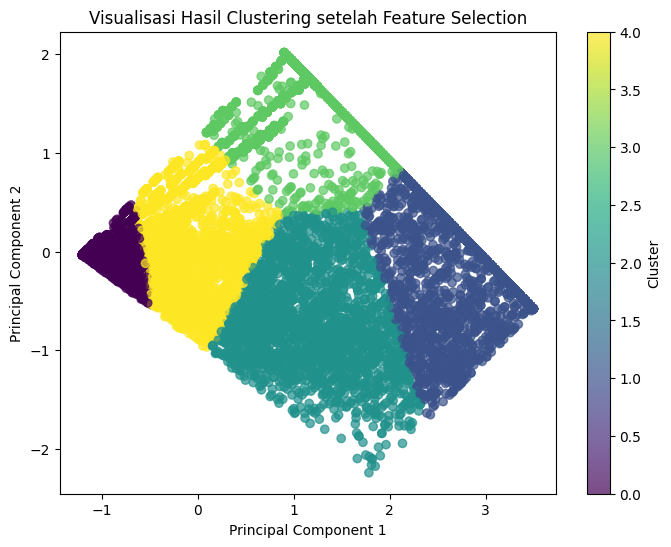

In [20]:
# Reduksi dimensi menggunakan PCA (2 komponen utama)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_selected)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_selected.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Hasil Clustering setelah Feature Selection")
plt.colorbar(label="Cluster")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [33]:
# 1. Tambahkan Hasil Label Cluster ke DataFrame
df["Cluster"] = model.labels_

# 2. Lakukan Inverse Transform pada fitur yang telah di-label encoding
if "Fitur" in df.columns:
    df["Fitur"] = label_encoder.inverse_transform(df["Fitur"])

# 3. Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
df_original = df.copy()


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
# Pastikan df_normalized hanya berisi kolom yang telah distandarisasi
df_normalized = df.filter(like="standardized_").copy()

# Inverse Transform untuk Data yang Distandarisasi
if not df_normalized.empty:
    df_normalized[df_normalized.columns] = scaler.inverse_transform(df_normalized)

# Mengembalikan data yang sudah di-inverse ke dalam dataset asli
df_original = df.copy()
for col in df_normalized.columns:
    original_col = col.replace("standardized_", "")  # Mendapatkan nama kolom asli
    if original_col in df_original.columns:
        df_original[original_col] = df_normalized[col]

# Menampilkan beberapa baris pertama dari dataset asli setelah inverse transform
print(df_original.head())


  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  \
0        1.66      53.0      0.10        79.18  Baden-Württemberg  2023-08-23   
1        1.56      90.0      0.10       126.36  Baden-Württemberg  2023-08-23   
2        1.17      73.0      0.05        81.14  Baden-Württemberg  2023-08-23   
3        3.22      59.0      0.10       170.98  Baden-Württemberg  2023-08-23   
4        0.87      35.0      0.10        27.40  Baden-Württemberg  2023-08-23   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Ringkasan Statistik Tiap Cluster:
          Unit_Price   Quantity  Discount  Total_Price  Cluster
Cluster                                                       
0          2.137567  12.783102  0.015725    19.370430      0.0
1         17.443656  55.110187  0.072978   483.499393      1.0


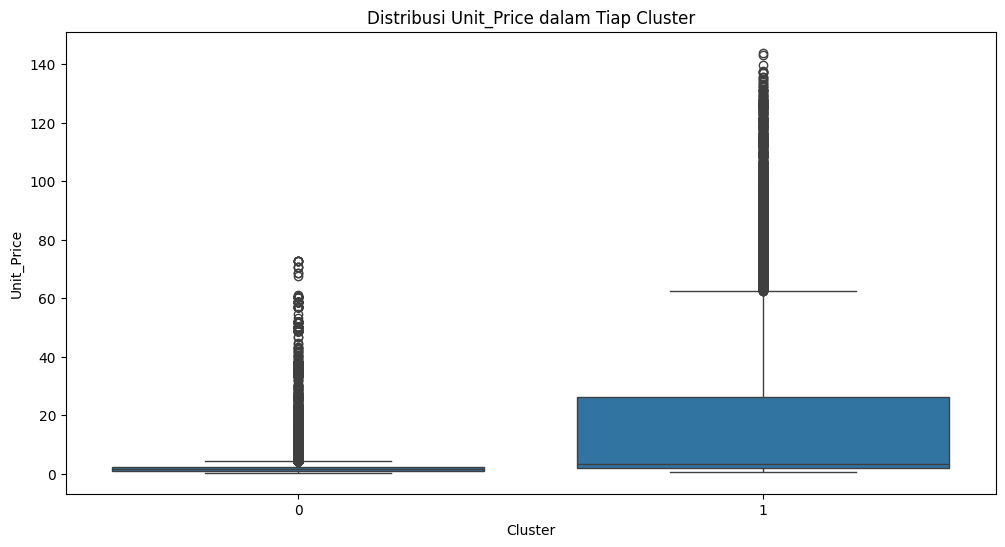

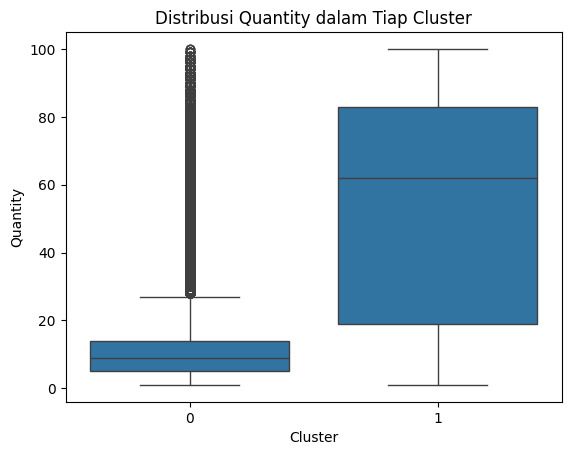

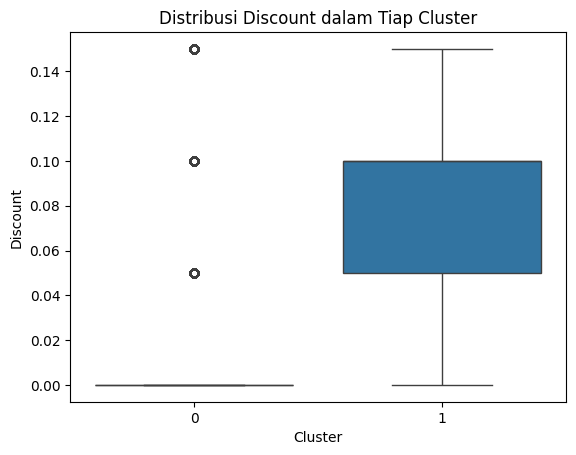

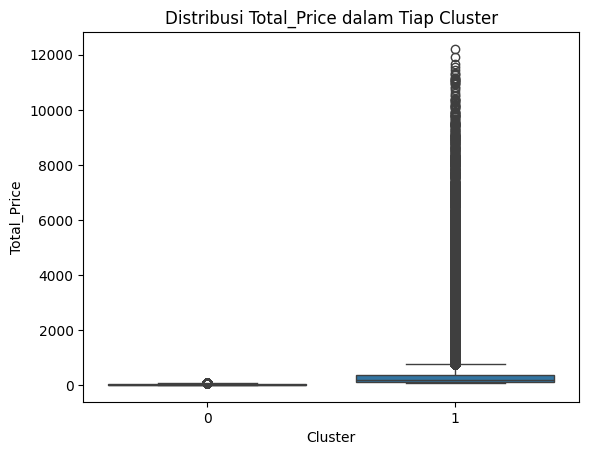

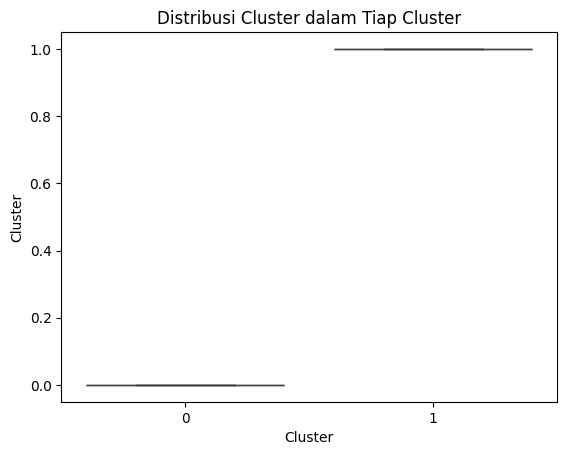


Interpretasi Hasil Clustering:

Cluster 1:
         Unit_Price      Quantity      Discount   Total_Price  Cluster
count  59036.000000  59036.000000  59036.000000  59036.000000  59037.0
mean      17.443656     55.110187      0.072978    483.499393      1.0
std       26.287729     31.645691      0.049032    979.654780      0.0
min        0.580000      1.000000      0.000000     55.100000      1.0
25%        2.050000     19.000000      0.050000    109.220000      1.0
50%        3.410000     62.000000      0.100000    174.150000      1.0
75%       26.232500     83.000000      0.100000    363.480000      1.0
max      143.960000    100.000000      0.150000  12212.400000      1.0

Cluster 0:
          Unit_Price       Quantity       Discount    Total_Price   Cluster
count  184912.000000  184912.000000  184912.000000  184912.000000  184912.0
mean        2.137567      12.783102       0.015725      19.370430       0.0
std         3.289133      14.001229       0.032806      17.158082       0.0
m

In [38]:
# 1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia
numeric_cols = df_original.select_dtypes(include=np.number).columns
cluster_summary = df_original.groupby("Cluster")[numeric_cols].mean()

# Menampilkan ringkasan statistik tiap cluster
print("Ringkasan Statistik Tiap Cluster:\n", cluster_summary)

# Visualisasi distribusi fitur dalam tiap cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for col in numeric_cols:
    sns.boxplot(x=df_original["Cluster"], y=df_original[col])
    plt.title(f"Distribusi {col} dalam Tiap Cluster")
    plt.show()

# 2. Interpretasi hasil clustering
print("\nInterpretasi Hasil Clustering:")
for cluster_id in df_original["Cluster"].unique():
    cluster_data = df_original[df_original["Cluster"] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(cluster_data[numeric_cols].describe())  # Hanya menampilkan statistik untuk kolom numerik


Tulis hasil interpretasinya di sini.

#### **Cluster 0:**  
- Memiliki **harga satuan (Unit_Price) rata-rata yang rendah** sebesar **2.14**, dengan nilai minimum **0.32** dan maksimum **72.70**.  
- **Jumlah barang (Quantity) yang dibeli per transaksi relatif sedikit**, dengan rata-rata **12.78** dan mayoritas transaksi berada di kisaran **5-14 unit**.  
- **Diskon yang diberikan sangat kecil** (**rata-rata 0.015 atau 1.57%**) dan mayoritas transaksi tidak mendapatkan diskon.  
- **Total harga transaksi cenderung rendah**, dengan rata-rata **19.37** dan mayoritas transaksi berada di kisaran **6.44 - 27.19**.  
- **Kesimpulan:** Cluster ini kemungkinan terdiri dari transaksi kecil atau pelanggan ritel dengan pembelian dalam jumlah kecil dan harga produk yang lebih murah.  

#### **Cluster 1:**  
- **Harga satuan (Unit_Price) lebih tinggi**, dengan rata-rata **17.44** dan nilai maksimum **143.96**.  
- **Jumlah barang yang dibeli per transaksi jauh lebih banyak**, dengan rata-rata **55.11** dan mayoritas transaksi berada di kisaran **19-83 unit**.  
- **Diskon yang diberikan lebih besar dibandingkan Cluster 0**, dengan rata-rata **0.073 (7.3%)**.  
- **Total harga transaksi sangat tinggi**, dengan rata-rata **483.49** dan beberapa transaksi mencapai **12,212.40**.  
- **Kesimpulan:** Cluster ini kemungkinan terdiri dari pembelian dalam jumlah besar (misalnya oleh pedagang grosir atau distributor) dengan harga produk yang lebih mahal dan diskon yang lebih sering diberikan.  

**Ringkasan:**  
- **Cluster 0**: Transaksi skala kecil, harga murah, diskon minim.  
- **Cluster 1**: Transaksi skala besar, harga tinggi, diskon lebih sering.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan variabel **Unit Price, Quantity, Discount, dan Total Price**.  

## **Cluster 0:**  
- **Rata-rata Harga Satuan (Unit Price):** 2.14  
- **Rata-rata Jumlah Barang Dibeli (Quantity):** 12.78 unit  
- **Rata-rata Diskon (Discount):** 1.57%  
- **Rata-rata Total Harga per Transaksi (Total Price):** 19.37  
- **Analisis:** Cluster ini mencerminkan pelanggan dengan pola pembelian dalam jumlah kecil dan harga satuan rendah. Sebagian besar transaksi dalam cluster ini dilakukan dengan sedikit atau tanpa diskon. Kemungkinan besar, pelanggan dalam cluster ini adalah **konsumen ritel atau individu** yang melakukan pembelian dalam jumlah kecil tanpa potongan harga yang signifikan.  

## **Cluster 1:**  
- **Rata-rata Harga Satuan (Unit Price):** 17.44  
- **Rata-rata Jumlah Barang Dibeli (Quantity):** 55.11 unit  
- **Rata-rata Diskon (Discount):** 7.3%  
- **Rata-rata Total Harga per Transaksi (Total Price):** 483.50  
- **Analisis:** Cluster ini terdiri dari pelanggan yang membeli dalam jumlah besar dengan harga satuan yang lebih tinggi. Mereka sering mendapatkan diskon yang lebih besar dibandingkan cluster sebelumnya. Hal ini menunjukkan bahwa pelanggan dalam cluster ini kemungkinan besar adalah **pedagang grosir, distributor, atau pelanggan loyal** yang melakukan pembelian dalam skala besar dengan harga lebih tinggi dan mendapatkan potongan harga lebih besar.  

**Kesimpulan:**  
- **Cluster 0:** Pelanggan ritel dengan pembelian kecil dan harga lebih murah.  
- **Cluster 1:** Pelanggan grosir atau distributor dengan pembelian dalam jumlah besar dan diskon lebih tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
# Simpan hasil clustering ke dalam file CSV
df_original.to_csv("Dataset_clustering.csv", index=False)

print("Hasil clustering telah disimpan dalam 'Dataset_clustering.csv'")


Hasil clustering telah disimpan dalam 'Dataset_clustering.csv'
